In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from model_simulator import ARXSimulator
from mpc_controller import MPCController
from plotly.subplots import make_subplots
from tqdm import tqdm
import random
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
B = [-0.00091497,  0.14029288]
A = [-1.04411331, 0.00942735,  0.00399007,  0.05331014]

horizon = 6
P = 0
Q = 10

# initialize array to store simulation results
t_sim = 48
# u_past_sim = np.zeros(4)
u_past_sim = np.ones(4) * 12
y_past_sim = np.ones(4) * 20
T_init = 4 #4 y_lags
y_ref_sim = np.array([])
y_ref = 45

mpc = MPCController(A, B, P, Q, horizon)
arx = ARXSimulator(A, B, y_past_sim, u_past_sim[-2:])

In [39]:
for t in tqdm(range(0,t_sim)):
    # print('u_past_sim: ', u_past_sim)
    # print('y_past_sim: ', y_past_sim)

    u_sim, y_sim = mpc.simulate(u_past_sim[-2:], y_past_sim[-4:], y_ref)
    if u_sim is  None:
        break
    u_past_sim = np.append(u_past_sim, u_sim[0])
    mwh_hat = arx.MW_to_MWh([u_sim[0]])
    y_past_sim = np.append(y_past_sim, mwh_hat)
    y_ref_sim = np.append(y_ref_sim,y_ref)
    # if t % 30 ==0:
    #     y_ref = random.choice([1, 1.5, 2, 2.7, 3, 1.7])

 17%|█▋        | 8/48 [00:00<00:01, 35.77it/s]

Solver status: optimal
Solver status: optimal
Solver status: optimal
Solver status: optimal
Solver status: optimal
Solver status: optimal
Solver status: optimal
Solver status: optimal


 25%|██▌       | 12/48 [00:00<00:01, 34.17it/s]

Solver status: optimal
Solver status: optimal
Solver status: optimal
Solver status: optimal
Solver status: optimal
Solver status: optimal
Solver status: optimal


 44%|████▍     | 21/48 [00:00<00:00, 35.61it/s]

Solver status: optimal
Solver status: optimal
Solver status: optimal
Solver status: optimal
Solver status: optimal
Solver status: optimal
Solver status: optimal
Solver status: optimal


 60%|██████    | 29/48 [00:00<00:00, 34.86it/s]

Solver status: optimal
Solver status: optimal
Solver status: optimal
Solver status: optimal
Solver status: optimal
Solver status: optimal


 77%|███████▋  | 37/48 [00:01<00:00, 31.27it/s]

Solver status: optimal
Solver status: optimal
Solver status: optimal
Solver status: optimal
Solver status: optimal
Solver status: optimal
Solver status: optimal
Solver status: optimal


 94%|█████████▍| 45/48 [00:01<00:00, 33.26it/s]

Solver status: optimal
Solver status: optimal
Solver status: optimal
Solver status: optimal
Solver status: optimal
Solver status: optimal
Solver status: optimal
Solver status: optimal


100%|██████████| 48/48 [00:01<00:00, 33.44it/s]

Solver status: optimal
Solver status: optimal
Solver status: optimal


In [ ]:
u_past_sim

In [ ]:
y_past_sim

Horizon (hours):  1.5  P:  0  Q:  10


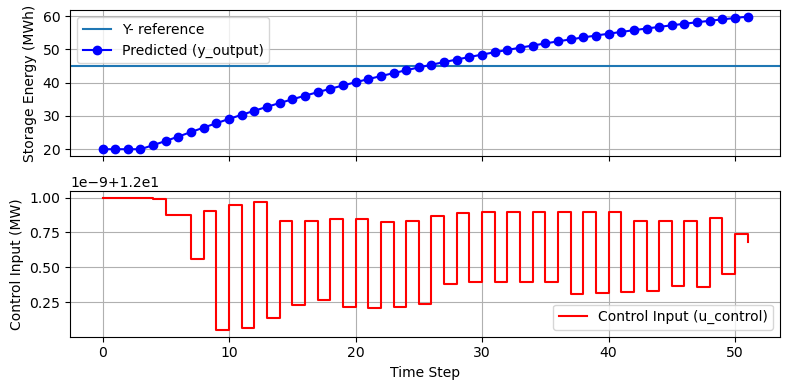

In [40]:
print('Horizon (hours): ', horizon/4, ' P: ', P, ' Q: ', Q )

time = range(len(y_past_sim))
fig, axs = plt.subplots(2, 1, figsize=(8, 4), sharex=True)

# Plot y_ref and y_output
# axs[0].plot(time, y_reference[:len(y_output)], label="Reference (y_ref)", linestyle="--", color="black")
axs[0].axhline(y_ref, label = 'Y- reference')
axs[0].plot(time, y_past_sim, label="Predicted (y_output)", marker="o", color="blue")
axs[0].set_ylabel("Storage Energy (MWh)")
axs[0].legend()
axs[0].grid(True)

# Plot u_control
axs[1].step(time, u_past_sim, label="Control Input (u_control)", where="post", color="red")
axs[1].set_xlabel("Time Step")
axs[1].set_ylabel("Control Input (MW)")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()